# تمرین سوم: کاهش نویز (قسمت اول)
تصویر مرد عکاس را در ورودی خوانده و نویزهای گاوسین، فلفل نمک را به آن اعمال کنید.
سپس فیلترهای میانگین ، میانه و گاوسین را به تصاویر تخریب شده اعمال کنید. اندازی فیلترها در سایزهای 3 در 3 و 5 در 5 در نظر
گرفته شود. تاثیر هرکدام از فیلترها را گزارش کنید. روند خواسته شده را برای تصویر بابون نیز تکرار نمایید. چه تفاوتی در اعمال
فیلترهای متفاوت در این دو تصویر مشاهده می نمایید، تفاوت ها را در قالب گزارش تشریح نمایید.

### Importing libraries

In [1]:
import cv2
import numpy as np
from skimage.util import random_noise
from skimage.morphology import disk
from skimage.filters import median
import matplotlib.pyplot as plt

### Reading original images

In [2]:
camera_man = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)
babon = cv2.imread("mandril.tiff", cv2.IMREAD_GRAYSCALE)

### Applying salt & pepper noise

In [3]:
salty_camera_man = random_noise(camera_man, mode='s&p', amount=0.1)
salty_babon = random_noise(babon, mode='s&p', amount=0.1)

### Applying gaussian noise

In [4]:
sigma = 0.1
gaussian_camera_man = random_noise(camera_man, mode='gaussian', var=sigma ** 2, mean=0)
gaussian_babon = random_noise(babon, mode='gaussian', var=sigma ** 2, mean=0)

### Showing origianl and noisy images

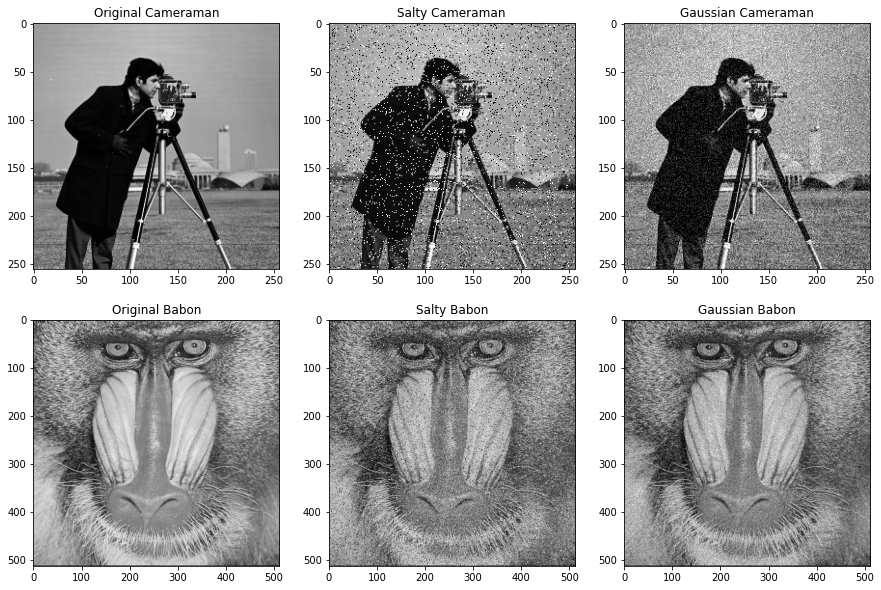

In [5]:
f, subplt = plt.subplots(2,3,figsize=(15,10))
subplt[0][0].imshow(camera_man,cmap='gray')
subplt[0][0].set_title("Original Cameraman")
subplt[0][1].imshow(salty_camera_man,cmap='gray')
subplt[0][1].set_title("Salty Cameraman")
subplt[0][2].imshow(gaussian_camera_man,cmap='gray')
subplt[0][2].set_title("Gaussian Cameraman")
subplt[1][0].imshow(babon,cmap='gray')
subplt[1][0].set_title("Original Babon")
subplt[1][1].imshow(salty_babon,cmap='gray')
subplt[1][1].set_title("Salty Babon")
subplt[1][2].imshow(gaussian_babon,cmap='gray')
subplt[1][2].set_title("Gaussian Babon")
plt.show()

نویز فلفل نمکی به صورت دانه های سفید و سیاه و نویز گاوسی شبیه برفک رو تصویر اختلال ایجاد می کند. به طور کلی مقدار مساوی از نویز به تصویر مرد عکاس صدمه به نظر بیشتری وارد می کند چرا که تصویر جزئیات ریز کمتری نسبت به بابون دارد. در تصویر بابون می توان گفت نویز ها با جزئیات تصویر تا حدی آمیخته میشود و به نظر بیننده شاید مقدار نویز کمتری احساس شود   

## Applying filters to salt & pepper noise

### Creating gates and kernels for filtering

In [6]:
gate3x3 = [[1, 2, 1],
           [2, 4, 2],
           [1, 2, 1]]
g_kernel3x3 = np.array(gate3x3, dtype=np.float32) / 16
avg_kernel3x3 = np.ones((3, 3), dtype=np.float32) / 9
gate5x5 = [[1, 1, 2, 1, 1],
           [1, 2, 4, 2, 1],
           [2, 4, 8, 4, 2],
           [1, 2, 4, 2, 1],
           [1, 1, 2, 1, 1]]
g_kernel5x5 = np.array(gate5x5, dtype=np.float32) / 52
avg_kernel5x5 = np.ones((5, 5), dtype=np.float32) / 25

### Applying filters to cameraman images

In [7]:
camera_man_gaussian3 = cv2.filter2D(salty_camera_man, -1, g_kernel3x3)
camera_man_avg3 = cv2.filter2D(salty_camera_man, -1, avg_kernel3x3)
camera_man_median3 = median(salty_camera_man, disk(3))
camera_man_gaussian5 = cv2.filter2D(salty_camera_man, -1, g_kernel5x5)
camera_man_avg5 = cv2.filter2D(salty_camera_man, -1, avg_kernel5x5)
camera_man_median5 = median(salty_camera_man, disk(5))

### Showing cameraman results

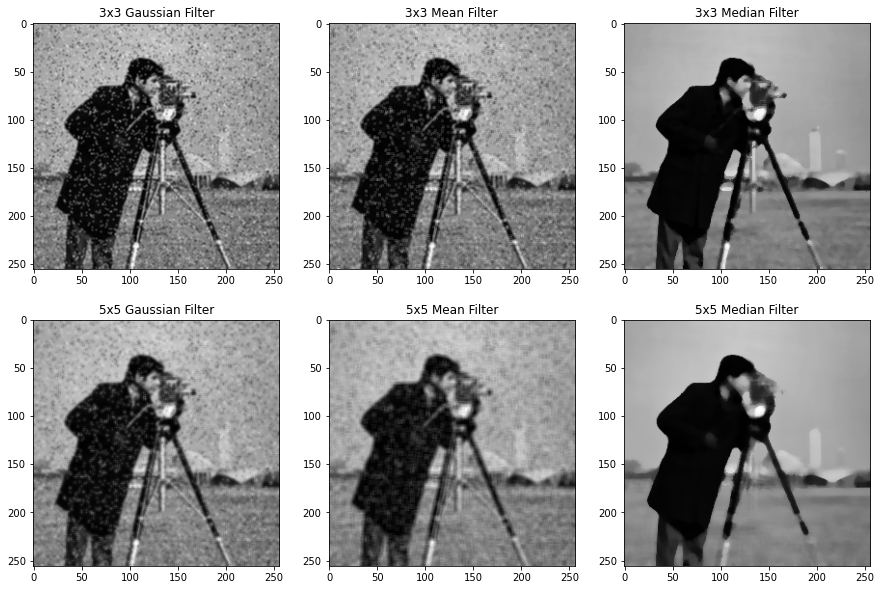

In [8]:
_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(camera_man_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(camera_man_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(camera_man_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(camera_man_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(camera_man_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(camera_man_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

در ابتدا به وضوح قابل مشاهده است که فیلتر میانی عملکرد به مراتب بهتری نسبت به دو فیلتر دیگر دارد. همچنین در کل فیلتر های سه در سه نسبت به پنج در پنج از لحاظ کیفیت به نظر بهتر می رسند چرا که فیلتر های ۵ در ۵ خود تصویر را تا حدی خراب می کنند اما تاثیر بیشتری نسبت به ۳ در ۳ برای ازبین بردن نویز ها ندارند. انتخاب بنده از بین فیلتر گاوسی  و فیلتر میانگین، فیلتر گاوسیست چرا که تقریبا هر دو فیلتر در از بین بردن نویز فلفل نمکی به یک میزان شکست خورده اند و دلیل این انتخاب بهتر بودن وضع لبه ها در فیلتر گاوسیست. این تفاوت در فیلتر ۵ در ۵ بین دو فیلتر میانگین و گاوسی بهتر قابل مشاهده می باشد

### Applying the same filters to babon images

In [9]:
gate = [[1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]]
kernel = np.array(gate, dtype=np.float32) / 16
babon_gaussian3 = cv2.filter2D(salty_babon, -1, kernel)

kernel = np.ones((3, 3), dtype=np.float32) / 9
babon_avg3 = cv2.filter2D(salty_babon, -1, kernel)

babon_median3 = median(salty_babon, disk(3))

gate = [[1, 1, 2, 1, 1],
        [1, 2, 4, 2, 1],
        [2, 4, 8, 4, 2],
        [1, 2, 4, 2, 1],
        [1, 1, 2, 1, 1]]
kernel = np.array(gate, dtype=np.float32) / 52
babon_gaussian5 = cv2.filter2D(salty_babon, -1, kernel)

kernel = np.ones((5, 5), dtype=np.float32) / 25
babon_avg5 = cv2.filter2D(salty_babon, -1, kernel)

babon_median5 = median(salty_babon, disk(5))

### Showing babon results

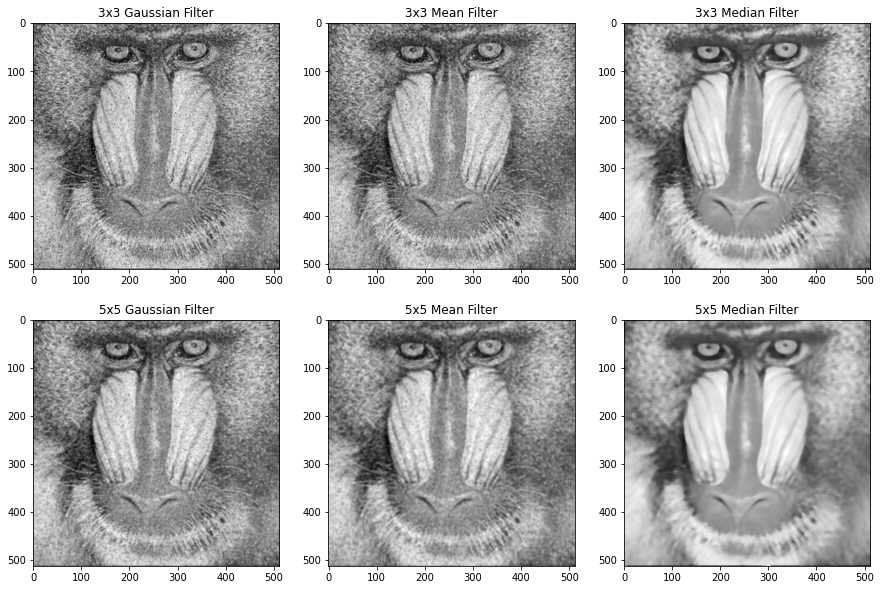

In [10]:
_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(babon_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(babon_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(babon_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(babon_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(babon_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(babon_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

تمامی موارد مطرح شده درباره مرد عکاس تا حد زیادی نیز در مورد بابون صدق می کنند. در این تصویر پیروزی بلامنازع فیلتر میانی برای حذف نویز های فلفل نمکی کاملا مشهود است و همچنین از مقایسه دریچه های ۳ در ۳ و ۵ در ۵ با هم می توان نتیجه گرفت فیلتر ۳ در ۳ کافی بوده و نویز ها تا حد کاملا قابل قبولی حذف می کند به صورتی که استفاده از دریچه ۵ در ۵ عملا فقط کیفیت تصویر را تحت الشعاع قرار داده و اصلا نویز بیشتری وجود ندارد تا بزرگ تر کردن دریچه کمکی به حذف آن کند! در مقابل همچنان فیلتر های میانگین و گاوسی تاثیر چندانی بر روی این نوع نویز ندارند به دلایل گفته شده در قسمت مرد عکاس فیلتر گاوسی ترجیح داده می شود.

## Applying filters to Gaussian noise

### Applying filters to cameraman images

In [11]:
camera_man_gaussian3 = cv2.filter2D(gaussian_camera_man, -1, g_kernel3x3)
camera_man_avg3 = cv2.filter2D(gaussian_camera_man, -1, avg_kernel3x3)
camera_man_median3 = median(gaussian_camera_man, disk(3))
camera_man_gaussian5 = cv2.filter2D(gaussian_camera_man, -1, g_kernel5x5)
camera_man_avg5 = cv2.filter2D(gaussian_camera_man, -1, avg_kernel5x5)
camera_man_median5 = median(gaussian_camera_man, disk(5))

### Showing cameraman results

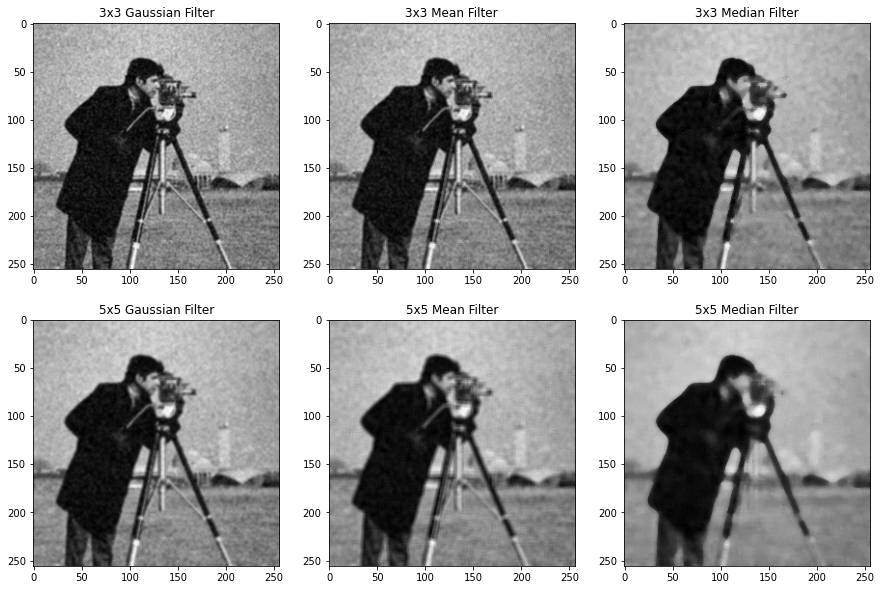

In [12]:
_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(camera_man_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(camera_man_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(camera_man_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(camera_man_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(camera_man_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(camera_man_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

با دقت در جزئیات تصویر مانند ساختمان های دور دست مشاهده میشود که فیلتر میانی جزئیات تصویر و لبه هارا بیشتر از دو فیلتر دیگر تخریب می کند در صورتی که تاثیر مثبت بر روی از بین بردن نویز آن تا حد دلخواه نیست. و از بین سه فیلتر در از بین بردن نویز گاوسی رتبه آخر را کسب می کند. اما در بین دو فیلتر میانگین و گاوسی باز رقابت سختی وجود دارد. قضاوت بین این دو فیلتر کمی مشکل به نظر می رسد اما دوباره به دلیل حفظ بهتر لبه ها انتخاب بنده فیلتر گاوسی خواهد بود. برای انتخاب سایز دریچه هم به نظر می رسد ۳ در ۳ همچنان انتخاب مناسبی است، زیرا هر چند فیلتر بزرگ تر نویز های بیشتر را حذف می کند اما از طرفی باعث پایین امدن کیفیت تصویر شده و در مقام مقایسه بیشتر کیفیت تصویر را پایین آورده تا نویز ها را حذف کند

### Applying filters to babon images

In [13]:
babon_gaussian3 = cv2.filter2D(gaussian_babon, -1, g_kernel3x3)
babon_avg3 = cv2.filter2D(gaussian_babon, -1, avg_kernel3x3)
babon_median3 = median(gaussian_babon, disk(3))
babon_gaussian5 = cv2.filter2D(gaussian_babon, -1, g_kernel5x5)
babon_avg5 = cv2.filter2D(gaussian_babon, -1, avg_kernel5x5)
babon_median5 = median(gaussian_babon, disk(5))

### Showing babon results

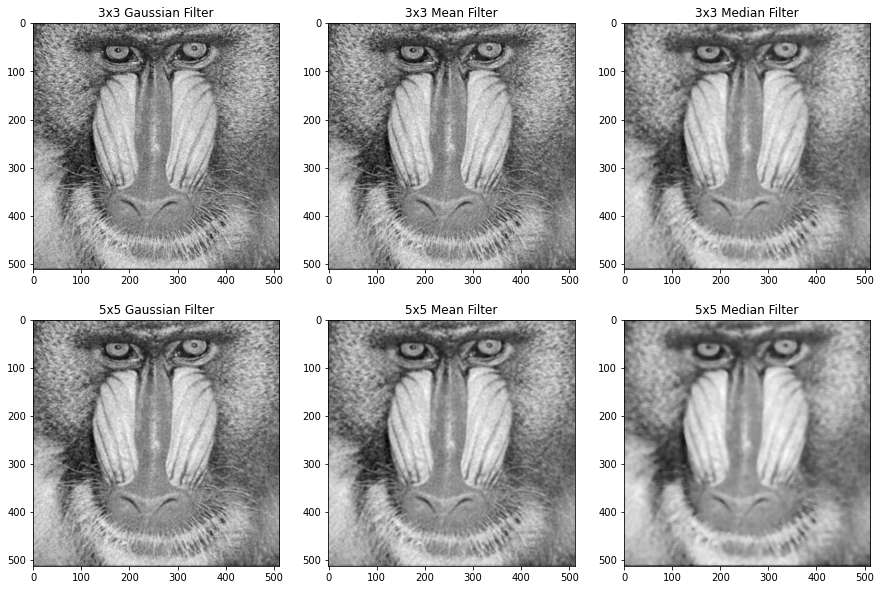

In [14]:
_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(babon_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(babon_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(babon_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(babon_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(babon_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(babon_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

در تصویر بابون نیز تمامی موارد مطرح شده در قسمت مرد عکاس صدق می کنند. در این تصویر تفاوت حفظ لبه ها در فیلتر گاوسی نسبت به فیلتر میانگین مخصوصا در دریچه ۵ در ۵ بیشتر قابل لمس بوده و همچنان رتبه بندی فیلتر ها به ترتیب گاوسی، میانگین، و میانی با اندازه دریچه های ۳ در ۳ خواهد بود